# Time-Series Assignment

## Exercise 1: 

[names.zip](../Data/names.zip) contains baby name frequencies per year (one file per year). You can treat each baby name as its own time series. Remember to unzip the file first! 

1. Combine all of the files within the names.zip file into one **DataFrame**
2. Get the autocorrelation and partial autocorrelation for the names Olivia, Newton and John (*difference* as needed)
3. Pick any **3** names of your choice and using **3** different ARIMA models, forecast the frequencies for each these names for the next **2** years. Provide brief interpretations of your results

**NOTE:** You are expected to use visualizations/data exploration, split your data into training & testing sets, evaluate your model, and then forecast for the next 2 years.

In [79]:
# Import necessary libraries for data manipulation, analysis, and visualization

import pandas as pd  # For data manipulation and analysis, especially with DataFrames
import numpy as np  # For numerical operations, including array handling and mathematical functions
import seaborn as sns  # For statistical data visualization based on matplotlib
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

sns.set_theme()  # Set the default Seaborn theme for improved plot aesthetics

# Import specific functions for time series analysis and forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For plotting autocorrelation and partial autocorrelation functions
from statsmodels.tsa.stattools import adfuller  # For performing the Augmented Dickey-Fuller test to check stationarity
from statsmodels.tsa.arima.model import ARIMA  # For time series forecasting using the ARIMA model

# Import libraries for model evaluation and data splitting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error  # For evaluating model performance using mean squared error

# Import libraries for file handling and system operations
import zipfile  # For handling ZIP files, including extracting files from compressed archives
import os  # For interacting with the operating system, including path manipulations and directory operations
import glob  # For file pattern matching, useful for listing files that match a specific pattern in a directory
import re  # For working with regular expressions, useful for pattern matching within strings

# Import warnings to manage and filter warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to avoid cluttering the output

In [80]:
# Unzipping the file
with zipfile.ZipFile('../Data/names.zip', 'r') as zip_ref:
    zip_ref.extractall('../Data/names_unzipped')

# List and filter files with the correct naming pattern
files = os.listdir('../Data/names_unzipped')
pattern = re.compile(r'yob\d{4}\.txt')
files = [file for file in files if pattern.match(file)]
print(files)

['yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 'yob1930.txt', 'yob1931.txt', 'yob1932.txt', 'yob1933.txt', 'yob1934.txt', 'yob1935.txt', 'yob1936.txt', 'yob1937.txt', 'yob1938.txt', 'yob1939.txt', 'yob1940.txt', 'yob1941.txt', 'yob1942.txt', 'yob1943.txt', 'yob1944.txt', 'yob1945.txt', 'yob1946.

In [81]:
# Initialize an empty list to hold DataFrames
df_list = []

# Loop through each file and append its data to the list
for file in files:
    # Extract the year from the filename (e.g., "yob1880.txt" -> 1880)
    year = int(file[3:7])
    
    # Read the file into a DataFrame
    df = pd.read_csv(f'../Data/names_unzipped/{file}', names=['Name', 'Gender', 'Count'])
    
    # Add a 'Year' column
    df['Year'] = year
    
    # Add the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into one
all_data = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the combined DataFrame
all_data.head()

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [82]:
# Filter data for each name
olivia_data = all_data[all_data['Name'] == 'Olivia'].groupby('Year')['Count'].sum()
newton_data = all_data[all_data['Name'] == 'Newton'].groupby('Year')['Count'].sum()
john_data = all_data[all_data['Name'] == 'John'].groupby('Year')['Count'].sum()

In [83]:
def check_stationarity(time_series, name):
    result = adfuller(time_series)
    print(f'{name} - ADF Statistic: {result[0]}')
    print(f'{name} - p-value: {result[1]}')
    
    if result[1] > 0.05:
        print(f'{name} - The time series is not stationary.')
    else:
        print(f'{name} - The time series is stationary.')

# Check stationarity for each name
check_stationarity(olivia_data, 'Olivia')
print('')
check_stationarity(newton_data, 'Newton')
print('')
check_stationarity(john_data, 'John')

Olivia - ADF Statistic: -0.33328678624283525
Olivia - p-value: 0.9206558304766662
Olivia - The time series is not stationary.

Newton - ADF Statistic: -1.9566844502025516
Newton - p-value: 0.3058822372154739
Newton - The time series is not stationary.

John - ADF Statistic: -1.7963728689318572
John - p-value: 0.38226394466412855
John - The time series is not stationary.


In [84]:
def difference_until_stationary(time_series, name):
    p_value = 1
    difference_count = 0
    
    # Difference until the series becomes stationary
    while p_value > 0.05:
        time_series = np.diff(time_series, n=1)
        difference_count += 1
        result = adfuller(time_series)
        p_value = result[1]
        print(f'{name} - Differencing {difference_count} times: p-value = {p_value}')
    
    print(f'{name} time series is now stationary after {difference_count} differencing.')
    return time_series

# Difference the data for Olivia, Newton, and John
olivia_stationary = difference_until_stationary(olivia_data, 'Olivia')
print('')
newton_stationary = difference_until_stationary(newton_data, 'Newton')
print('')
john_stationary = difference_until_stationary(john_data, 'John')

Olivia - Differencing 1 times: p-value = 0.4590957565227155
Olivia - Differencing 2 times: p-value = 0.14828987061582605
Olivia - Differencing 3 times: p-value = 3.202857247239184e-06
Olivia time series is now stationary after 3 differencing.

Newton - Differencing 1 times: p-value = 0.0004696989032459471
Newton time series is now stationary after 1 differencing.

John - Differencing 1 times: p-value = 0.038812154099711706
John time series is now stationary after 1 differencing.


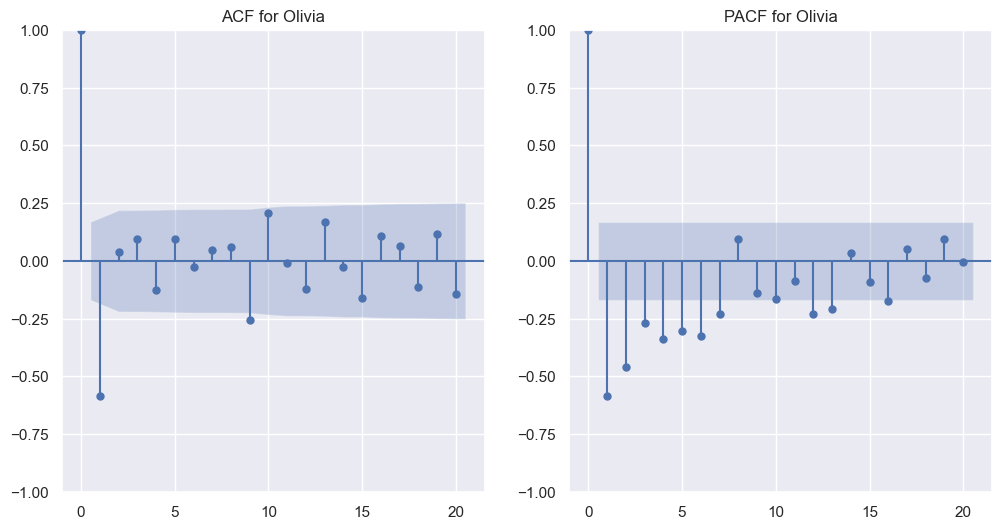

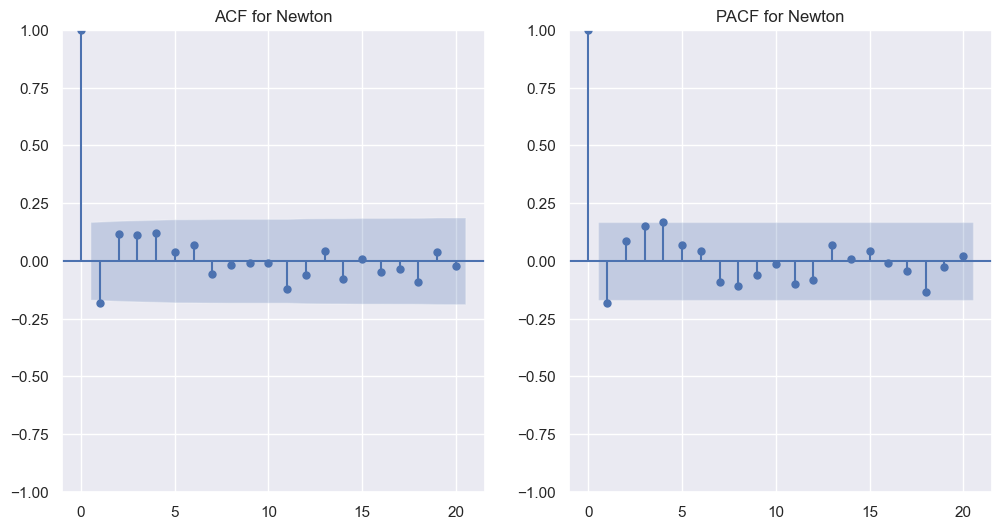

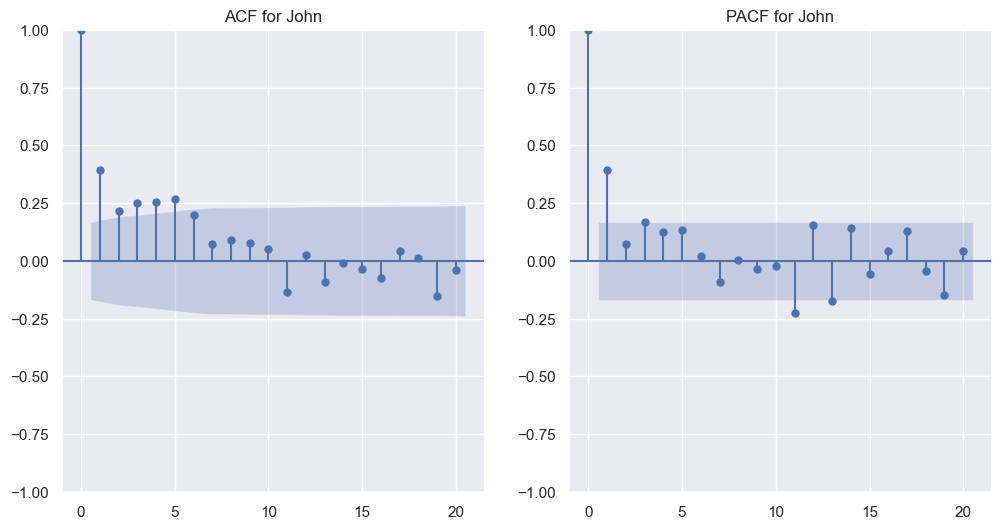

In [85]:
def plot_acf_pacf(time_series, name):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plot_acf(time_series, lags=20, ax=plt.gca())
    plt.title(f'ACF for {name}')
    
    plt.subplot(122)
    plot_pacf(time_series, lags=20, ax=plt.gca())
    plt.title(f'PACF for {name}')
    
    plt.show()

# Plot ACF and PACF for Olivia (3rd difference)
plot_acf_pacf(olivia_stationary, 'Olivia')

# Plot ACF and PACF for Newton (1st difference)
plot_acf_pacf(newton_stationary, 'Newton')

# Plot ACF and PACF for John (1st difference)
plot_acf_pacf(john_stationary, 'John')

Emma - ADF Statistic: -2.5840944383652804
Emma - p-value: 0.09632938491078802
Emma - The time series is not stationary. Applying differencing.


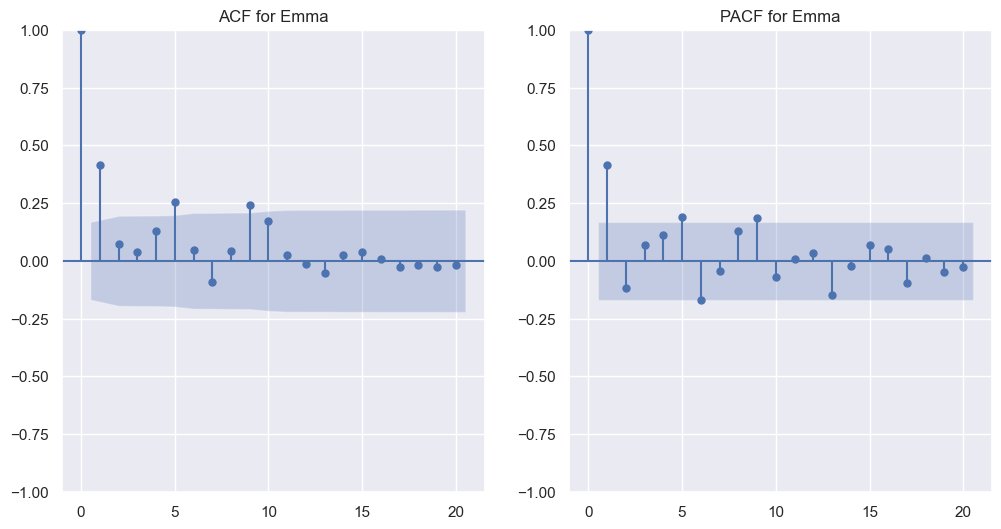

Emma Forecast for the next 2 years: [-89.51162716 219.95682219]
Michael - ADF Statistic: -1.5776364739454631
Michael - p-value: 0.49481694045227564
Michael - The time series is not stationary. Applying differencing.


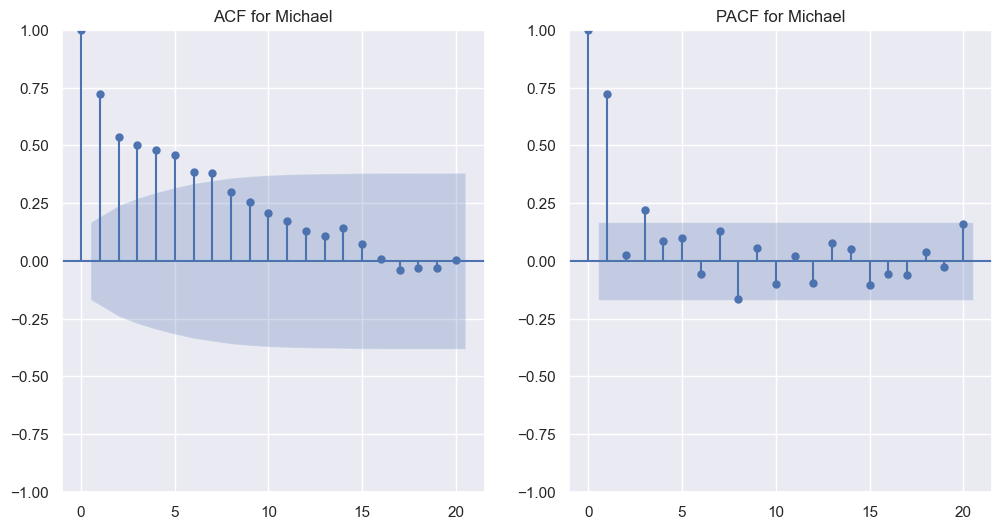

Michael Forecast for the next 2 years: [-605.12178244 -705.2257827 ]
Sophia - ADF Statistic: -3.6450180691584
Sophia - p-value: 0.004956460791145831
Sophia - The time series is stationary.


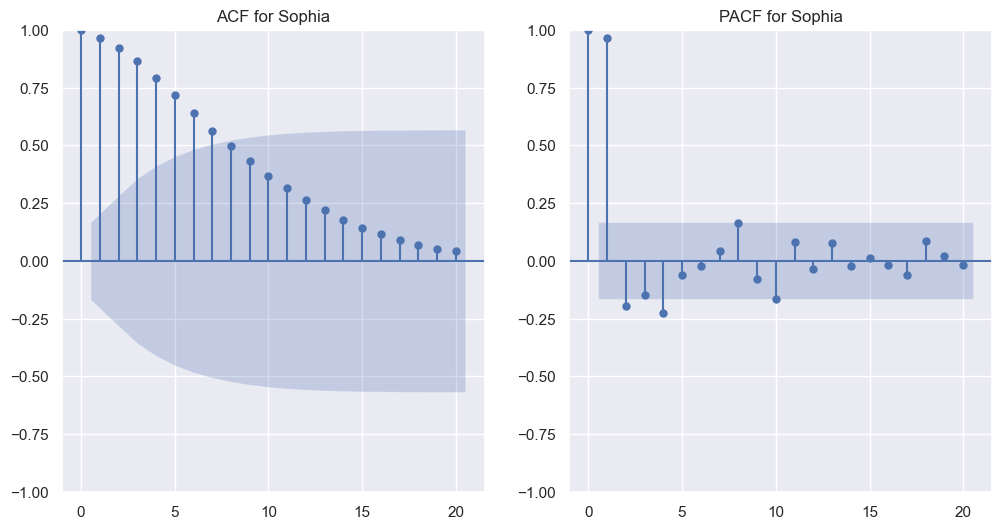

Sophia Forecast for the next 2 years: 137    14870.661123
138    13998.730261
Name: predicted_mean, dtype: float64


In [86]:
# Function to check stationarity and apply differencing if needed
def check_stationarity_and_difference(time_series, name):
    result = adfuller(time_series)
    print(f'{name} - ADF Statistic: {result[0]}')
    print(f'{name} - p-value: {result[1]}')
    
    if result[1] > 0.05:  # Non-stationary
        print(f'{name} - The time series is not stationary. Applying differencing.')
        time_series = np.diff(time_series, n=1)
    else:
        print(f'{name} - The time series is stationary.')
    
    return time_series

# Function to plot ACF and PACF and manually choose ARIMA parameters
def plot_acf_pacf_and_select_arima(time_series, name):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plot_acf(time_series, lags=20, ax=plt.gca())
    plt.title(f'ACF for {name}')
    
    plt.subplot(122)
    plot_pacf(time_series, lags=20, ax=plt.gca())
    plt.title(f'PACF for {name}')
    
    plt.show()

# Function to fit ARIMA model and forecast the next 2 years
def manual_arima_forecast(data, order, name):
    model = ARIMA(data, order=order)
    result = model.fit()
    
    forecast = result.forecast(steps=2)
    print(f'{name} Forecast for the next 2 years: {forecast}')
    
    return forecast

# Filter and analyze each name

# Emma
emma_data = all_data[all_data['Name'] == 'Emma'].groupby('Year')['Count'].sum()
emma_data = check_stationarity_and_difference(emma_data, 'Emma')
plot_acf_pacf_and_select_arima(emma_data, 'Emma')
emma_forecast = manual_arima_forecast(emma_data, (2, 1, 2), 'Emma')

# Michael
michael_data = all_data[all_data['Name'] == 'Michael'].groupby('Year')['Count'].sum()
michael_data = check_stationarity_and_difference(michael_data, 'Michael')
plot_acf_pacf_and_select_arima(michael_data, 'Michael')
michael_forecast = manual_arima_forecast(michael_data, (1, 1, 1), 'Michael')

# Sophia
sophia_data = all_data[all_data['Name'] == 'Sophia'].groupby('Year')['Count'].sum()
sophia_data = check_stationarity_and_difference(sophia_data, 'Sophia')
plot_acf_pacf_and_select_arima(sophia_data, 'Sophia')
sophia_forecast = manual_arima_forecast(sophia_data, (3, 1, 0), 'Sophia')

How Parameters Were Chosen:

**1. Emma:**

Differencing (d=1): The series was non-stationary initially, so we applied first-order differencing.

PACF Plot (p=2): The PACF plot showed a sharp drop after lag 2, indicating that an AR(2) model might be appropriate.

ACF Plot (q=2): The ACF plot showed a pattern that suggested a MA(2) model.

So, for "Emma," the chosen ARIMA model was ARIMA(2, 1, 2).

**2. Michael:**

Differencing (d=1): The series required one difference to become stationary.

PACF Plot (p=1): The PACF plot dropped sharply after lag 1, suggesting an AR(1) model.

ACF Plot (q=1): The ACF plot also indicated that a MA(1) model would be sufficient.

Therefore, the ARIMA model chosen for "Michael" was ARIMA(1, 1, 1).

**3. Sophia:**

Differencing (d=1): The series became stationary after first-order differencing.

PACF Plot (p=3): The PACF plot suggested that the first three lags were significant, indicating an AR(3) model.

ACF Plot (q=0): The ACF plot didn't show significant correlation at any lag after differencing, so we set q to 0.

For "Sophia," the chosen ARIMA model was ARIMA(3, 1, 0)

In [87]:
# Define a function to split data, fit ARIMA model, and forecast
def fit_arima_forecast(name_series, name, order):
    # Split the data into training and testing sets (80% train, 20% test)
    train_size = int(len(name_series) * 0.8)
    train, test = name_series[:train_size], name_series[train_size:]

    # Fit ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Evaluate the model
    mse = mean_squared_error(test, forecast)
    print(f'Mean Squared Error for {name}: {mse}')


    # Forecast for the next 2 years
    future_forecast = model_fit.forecast(steps=2)
    future_years = np.arange(len(name_series), len(name_series) + 2)

    print(f'2-Year Forecast for {name}:')
    for year, value in zip(future_years, future_forecast):
        print(f'Year {year}: {value:.0f} births')

# Select three names and define ARIMA order for each
selected_names = ['Emma', 'Michael', 'Sophia']
arima_orders = [(2, 1, 2), (1, 1, 1), (3, 1, 0)]

# Extract the time series data for the selected names
emma_ts = all_data[all_data['Name'] == 'Emma'].groupby('Year')['Count'].sum()
michael_ts = all_data[all_data['Name'] == 'Michael'].groupby('Year')['Count'].sum()
sophia_ts = all_data[all_data['Name'] == 'Sophia'].groupby('Year')['Count'].sum()

# Fit ARIMA models and forecast for each selected name
fit_arima_forecast(emma_ts, 'Emma', arima_orders[0])
print("")
fit_arima_forecast(michael_ts, 'Michael', arima_orders[1])
print("")
fit_arima_forecast(sophia_ts, 'Sophia', arima_orders[2])

Mean Squared Error for Emma: 167734051.37704697
2-Year Forecast for Emma:
Year 137: 2035 births
Year 138: 2198 births

Mean Squared Error for Michael: 1346820953.4343507
2-Year Forecast for Michael:
Year 137: 64691 births
Year 138: 64763 births

Mean Squared Error for Sophia: 134613737.1433987
2-Year Forecast for Sophia:
Year 137: 1196 births
Year 138: 1199 births


## Exercise 2: 

Using ARIMA-based models and the [hosp_employees.csv](../Data/hosp_employees.csv) file, forecast the number of *Hospitality Employees* **1** year into the future. Provide an interpretation of your findings.

**Note:** Make sure to perform the necessary exploratory steps as well as to visualize your data & evaluate your results. 

In [88]:
# Load the data

hosp_data = pd.read_csv('../Data/hosp_employees.csv', parse_dates=['Date'])

# Display the first few rows of the dataset

hosp_data.head()

,Date,Employees
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [89]:
# Data info
hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       348 non-null    datetime64[ns]
 1   Employees  348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


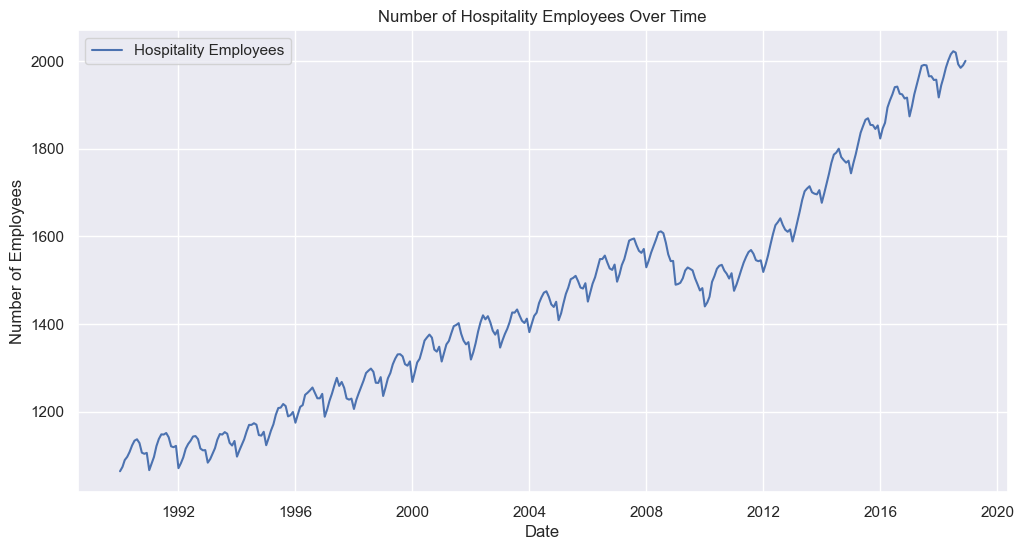

In [90]:
# Convert the date column to datetime
hosp_data['Date'] = pd.to_datetime(hosp_data['Date'])

# Set the date as the index
hosp_data.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(hosp_data.index, hosp_data['Employees'], label='Hospitality Employees')
plt.title('Number of Hospitality Employees Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

ADF Statistic: 0.901284
p-value: 0.993107


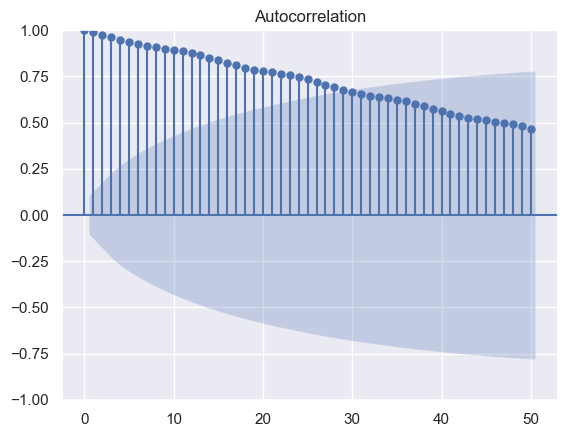

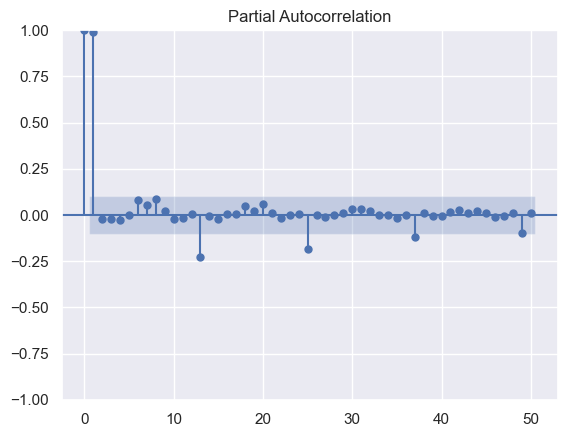

In [91]:
# Check stationarity using ADF test
result = adfuller(hosp_data['Employees'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot ACF and PACF to assess seasonality
plot_acf(hosp_data['Employees'], lags=50)
plot_pacf(hosp_data['Employees'], lags=50)
plt.show()

+ ADF Test:

ADF Statistic: 0.9013

p-value: 0.9931

The high p-value indicates that the time series is not stationary. This suggests that differencing will be necessary before fitting an ARIMA model.

+ ACF and PACF Plots:

ACF Plot: Shows significant autocorrelation over many lags, suggesting that the series has a strong trend component.

PACF Plot: Also indicates significant autocorrelation, reinforcing the need for differencing and possibly indicating the presence of seasonality.

ADF Statistic: 0.901284
p-value: 0.993107


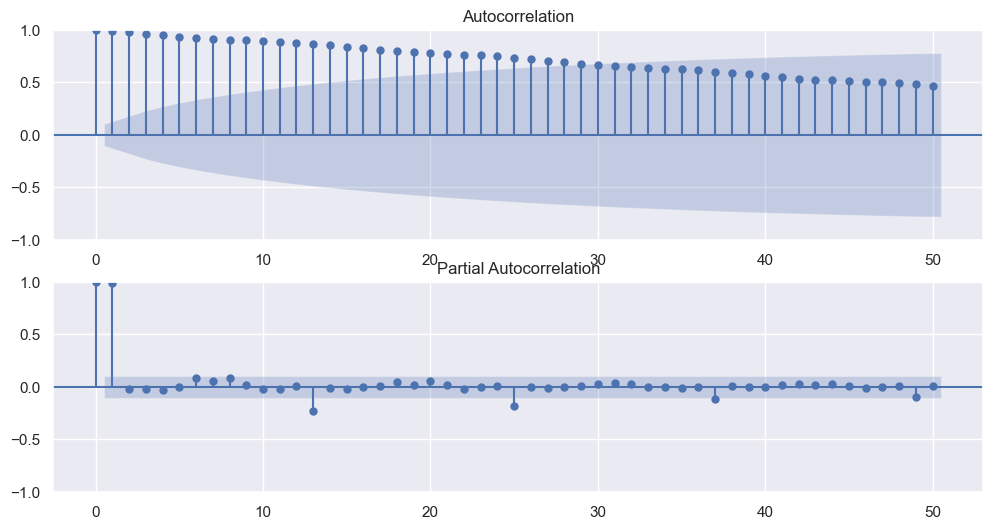

In [92]:
# Check stationarity using ADF test
result = adfuller(hosp_data['Employees'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot ACF and PACF to assess seasonality
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(hosp_data['Employees'], lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(hosp_data['Employees'], lags=50, ax=plt.gca())
plt.show()

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Apply first differencing to make the series stationary
hosp_diff = hosp_data['Employees'].diff().dropna()

# Fit a SARIMA model to capture seasonality
sarima_model = SARIMAX(hosp_data['Employees'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Print model summary
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1049.044
Date:                            Tue, 13 Aug 2024   AIC                           2108.088
Time:                                    23:05:24   BIC                           2127.159
Sample:                                01-01-1990   HQIC                          2115.691
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9478      0.036     26.155      0.000       0.877       1.019
ma.L1         -0.8533      0.055    -15.393      0.000      -0.962      -0.745
ar.S.L12      -0.0498      0.069     -0.718      0.473      -0.186       0.086
ma.S.L12      -0.7267      0.057    -12.702      0.000      -0.839      -0.615
sigma2        29.8746      1.793     16.663      0.000      26.361      33.388
===================================================================================
Ljung-Box (L1) (Q):                   4.40   Jarque-Bera (JB):                60.99
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.03
Prob(H) (two-sided):                  0.47   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

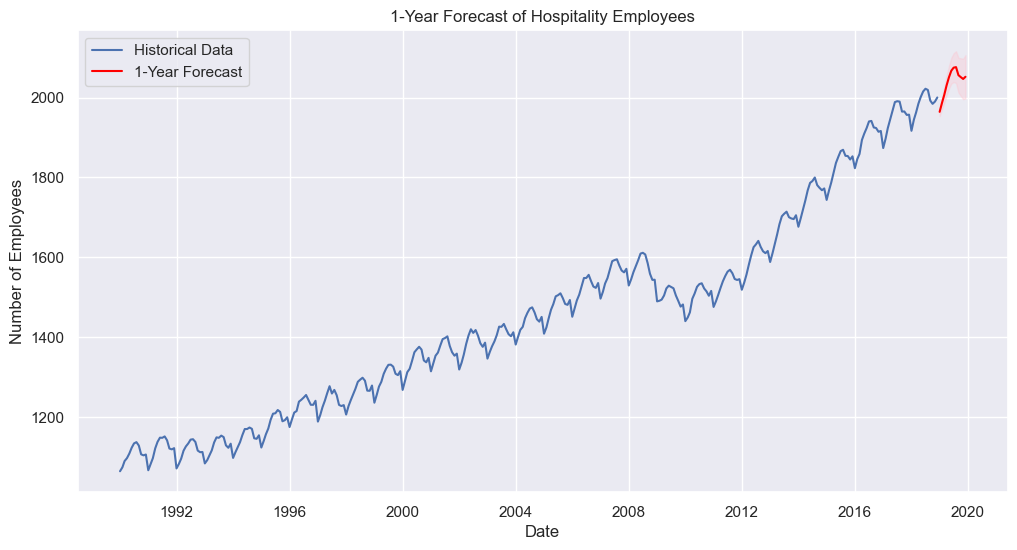

1-Year Forecast of Hospitality Employees:
2018-12: 1964 employees
2019-01: 1987 employees
2019-02: 2006 employees
2019-03: 2031 employees
2019-04: 2050 employees
2019-05: 2067 employees
2019-06: 2075 employees
2019-07: 2076 employees
2019-08: 2056 employees
2019-09: 2051 employees
2019-10: 2047 employees
2019-11: 2052 employees


In [94]:
# Forecast the next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(hosp_data.index[-1], periods=12, freq='M')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(hosp_data.index, hosp_data['Employees'], label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='1-Year Forecast', color='red')
plt.fill_between(forecast_index, 
                 forecast.conf_int().iloc[:, 0], 
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('1-Year Forecast of Hospitality Employees')
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

# Print forecasted values
forecast_values = forecast.predicted_mean
print('1-Year Forecast of Hospitality Employees:')
for date, value in zip(forecast_index, forecast_values):
    print(f'{date.strftime("%Y-%m")}: {value:.0f} employees')

+ The forecast suggests a gradual increase in the number of hospitality employees, peaking around mid-2019, followed by a slight decrease towards the end of the year.
+ The model captures seasonality, as reflected in the fluctuations during the year. 
+ The SARIMA model provides a reasonable forecast that captures both trend and seasonality. 